# Two Layer Nueral Network

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data Processing

In [2]:
data = pd.read_csv('~/Dev/engr-492/midterm1/train.csv')

data = np.array(data) # convert to numpy array
m, n = data.shape     # m: rows, n: columns
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n] # first row is the header
X_test = X_test / 255   # normalize

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] # first row is the header
X_train = X_train / 255   # normalize

## Preperation for Gradient Decent

In [3]:
layer1_nc = 16
layer2_nc = 10 # must be at least 10, > 10 has no effect on accuracy


def init_params():
    """
    Returns random weights and biases for layers one (W1, b1) & two (W2, b2).
    """
    W1 = np.random.rand(layer1_nc, 784) - 0.5
    b1 = np.random.rand(layer1_nc, 1) - 0.5
    W2 = np.random.rand(layer2_nc, layer1_nc) - 0.5
    b2 = np.random.rand(layer2_nc, 1) - 0.5
    
    return W1, b1, W2, b2


def ReLU(Z):
    """
    Rectified Linear Unit.
    """
    return np.maximum(0, Z)


def softmax(Z):
    """
    Returns the normalized exponetial function of Z.
    """
    return np.exp(Z) / sum(np.exp(Z))
    

def forward_prop(W1, b1, W2, b2, X):
    """
    Returns the results of the linear function & activation function
    for layers one (Z1, A1) & two (Z2, A2).

    A2: predicitons
    """
    # layer one
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    # layer two (output layer)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) # predictions
    
    return Z1, A1, Z2, A2


def deriv_ReLU(Z):
    return Z > 0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, layer2_nc))
    one_hot_Y[np.arange(Y.size), Y] = 1 # encoding
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Returns the gradients for the wieghts & biases
    """
    one_hot_Y = one_hot(Y)

    # layer two (output layer)
    dZ2 = A2 - one_hot_Y # prediction error
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)

    # layer one
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    return W1, b1, W2, b2

## Gradient Descent

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    """
    Returns the trained & final weights & biases.
    """
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        # training
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)                          # make a prediciton
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)              # find parameter gradients      
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha) # update parameters

        if i % 100 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

    # print message for final iteration
    print("Iteration: ", iterations)
    print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
            
    return W1, b1, W2, b2

## Training

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[1 1 3 ... 9 1 1] [3 0 5 ... 9 9 6]
Accuracy:  0.10846341463414634
Iteration:  100
[3 0 3 ... 9 1 6] [3 0 5 ... 9 9 6]
Accuracy:  0.7024634146341463
Iteration:  200
[3 0 5 ... 9 9 6] [3 0 5 ... 9 9 6]
Accuracy:  0.8012682926829269
Iteration:  300
[3 0 5 ... 9 9 6] [3 0 5 ... 9 9 6]
Accuracy:  0.8353658536585366
Iteration:  400
[3 0 5 ... 9 7 6] [3 0 5 ... 9 9 6]
Accuracy:  0.8538048780487805
Iteration:  500
[3 0 5 ... 9 7 6] [3 0 5 ... 9 9 6]
Accuracy:  0.8675121951219512


## Examples

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    """
    Displays the model's prediciton along with the true label & image
    """
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index] # true label
    print("Prediciton: ", prediction)
    print("Label: ", label)

    # display image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediciton:  [6]
Label:  6


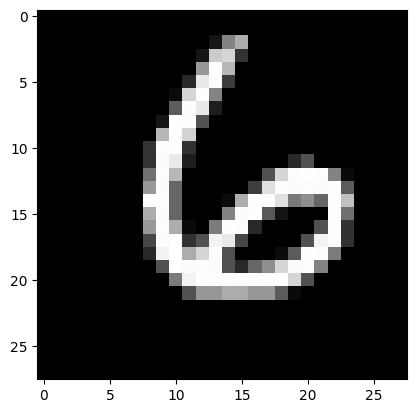

Prediciton:  [4]
Label:  9


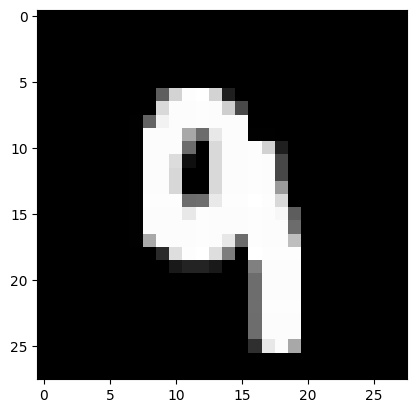

Prediciton:  [0]
Label:  0


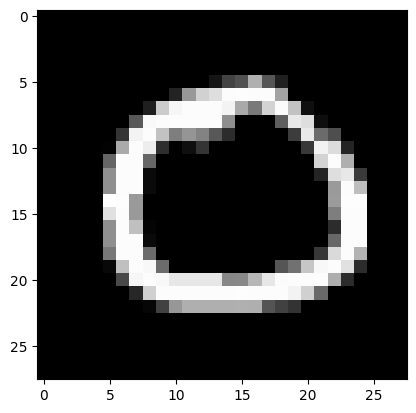

Prediciton:  [1]
Label:  1


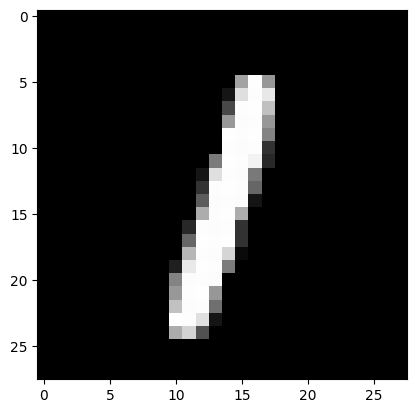

Prediciton:  [0]
Label:  0


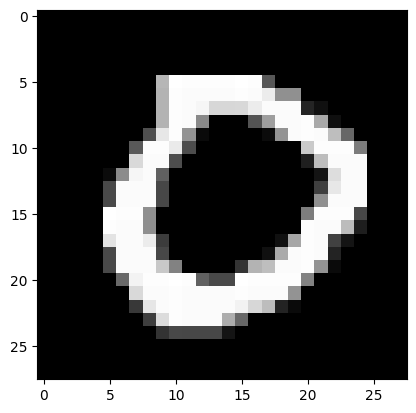

In [7]:
for _ in range(5):
    test_prediction(np.random.randint(0, n), W1, b1, W2, b2)

## Accuracy on Test Set

In [8]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[5 3 0 9 1 5 1 6 9 7 6 5 7 8 9 7 8 2 3 8 3 7 0 9 2 9 0 6 7 3 8 0 8 3 1 2 3
 7 9 5 0 6 1 3 3 9 8 5 4 6 1 0 6 5 8 4 3 9 4 3 3 9 2 7 8 1 2 6 4 0 9 8 3 6
 2 5 2 4 2 5 2 2 0 4 2 7 3 1 6 4 9 6 7 0 0 8 1 9 1 7 3 0 5 7 7 7 3 2 9 9 4
 0 0 9 9 5 1 4 3 7 8 1 2 3 2 8 9 2 5 1 1 8 2 4 0 9 4 6 9 0 3 3 7 0 5 6 9 6
 0 8 2 6 4 8 3 5 6 2 5 5 1 6 7 1 5 7 8 4 4 0 4 8 2 5 5 0 6 2 7 7 9 1 0 4 0
 7 8 1 5 1 2 6 7 6 1 1 7 5 7 8 7 6 2 2 5 6 5 7 7 5 7 9 2 9 1 7 7 3 1 9 7 9
 8 0 0 6 2 7 8 5 1 3 1 8 8 5 9 0 8 3 9 2 2 1 7 2 6 4 1 6 9 7 7 7 3 9 3 3 7
 3 8 4 9 4 6 6 3 7 9 5 8 3 0 2 1 1 6 2 0 3 4 3 5 0 9 6 6 0 9 2 3 1 1 1 5 6
 4 6 6 5 5 3 1 1 3 7 0 7 3 6 2 7 3 9 9 1 7 2 9 3 2 3 3 3 3 8 6 2 2 9 5 0 7
 6 2 7 7 2 2 2 2 3 7 4 0 0 2 4 7 5 8 0 0 9 7 1 9 1 8 2 6 4 6 7 0 0 3 6 4 9
 3 6 0 1 1 0 2 7 4 7 5 2 8 7 0 9 9 3 0 2 0 0 9 5 1 3 3 3 6 3 4 7 8 0 4 3 9
 8 9 9 8 6 3 9 2 0 1 0 1 0 6 8 9 1 8 6 5 4 0 4 5 2 1 1 8 1 5 7 1 7 0 1 8 9
 5 1 1 9 0 5 9 7 1 8 0 7 9 6 1 7 7 6 7 5 0 9 4 1 2 7 2 4 3 9 3 4 3 9 7 6 6
 0 5 2 8 6 2 8 5 1 3 2 1 

0.853